In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Qobj, tensor, basis

<center>
<h1>Bell inequalities</h1>
</center>

## Historical Context

The Bell inequalities are named after physicist John S. Bell, who developed them in 1964 as a response to the famous Einstein-Podolsky-Rosen (EPR) paradox, published in 1935. The EPR paradox highlighted the seemingly counterintuitive predictions of quantum mechanics regarding the correlations between entangled particles. Einstein, Podolsky, and Rosen argued that these correlations suggested that quantum mechanics was incomplete and that there must exist "hidden variables" to account for these correlations without resorting to what Einstein called "spooky action at a distance." Bell's work showed that any local hidden variable theory would be subject to certain inequalities, now known as the Bell inequalities.

## The Concept of Local Realism

Local realism is a philosophical position that combines two principles:


- **Realism:** The properties of a physical system exist independently of whether they are measured or not.
- **Locality:** Physical influences cannot propagate faster than the speed of light.

In the context of the EPR paradox, local realism suggests that the properties of entangled particles are determined before any measurement is made, and that there is no instantaneous interaction between the particles when one of them is measured.

## Deriving the Bell Inequalities

Consider a pair of entangled particles, A and B, that are space-like separated, meaning that they are far enough apart that no signal can travel between them faster than the speed of light. We want to test if a local hidden variable theory can explain the correlations between the particles' properties.

Let $\lambda$ represent the hidden variable, and let $P(\lambda)$ denote the probability distribution of $\lambda$. We will use $A(a, \lambda)$ and $B(b, \lambda)$ to represent the outcomes of measurements made on particles A and B, respectively, when the measurement settings are $a$ and $b$. The outcomes can be either +1 or -1.

The expectation value of the product of the outcomes can be written as:

\begin{equation}
    E(a, b) = \int d\lambda \, P(\lambda) A(a, \lambda) B(b, \lambda).
\end{equation}

Now consider a third measurement setting $c$. According to local realism, the correlations between the outcomes should satisfy the following inequality:

\begin{equation}
    |E(a, b) - E(a, c)| \leq E(b, c) + 1.
\end{equation}

This is known as the Clauser-Horne-Shimony-Holt (CHSH) inequality, a specific form of the Bell inequalities.


## Quantum Predictions and the Violation of Bell Inequalities

In quantum mechanics, the outcomes of measurements on entangled particles can be described using a quantum state $\psi$. For example, if particles A and B are in a singlet state, their quantum state can be represented as:

\begin{equation}
    |\psi\rangle = \frac{1}{\sqrt{2}} (|+\rangle_A |- \rangle_B - |-\rangle_A |+\rangle_B),
\end{equation}

where $|+\rangle$ and $|-\rangle$ denote the possible outcomes of the measurements. The expectation value of the product of the outcomes in quantum mechanics can be written as:

\begin{equation}
    E_{QM}(a, b) = \langle \psi | A(a) \otimes B(b) | \psi \rangle.
\end{equation}

Using the singlet state and choosing appropriate measurement settings, it can be shown that the quantum mechanical expectation values violate the CHSH inequality:

\begin{equation}
    |E_{QM}(a, b) - E_{QM}(a, c)| \leq E_{QM}(b, c) + 1.
\end{equation}

This violation demonstrates that the predictions of quantum mechanics are incompatible with local realism, and that entanglement cannot be explained by local hidden variables.

### Lets see this in action!

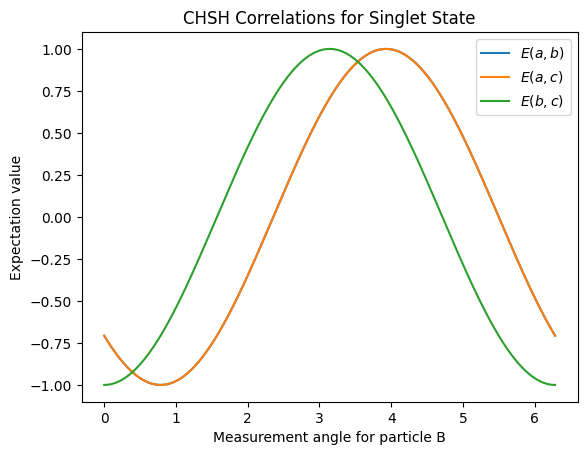

In [3]:
A = lambda a: Qobj([[np.cos(a), np.sin(a)], [np.sin(a), -np.cos(a)]])
B = lambda b: Qobj([[np.cos(b), np.sin(b)], [np.sin(b), -np.cos(b)]])

def singlet_state():
    up = basis(2, 0)
    down = basis(2, 1)
    return (tensor(up, down) - tensor(down, up)).unit()

def chsh_correlation(psi, a, b):
    Aa = A(a)
    Bb = B(b)
    return (psi.dag() * tensor(Aa, Bb) * psi).full()[0, 0].real

angles = np.linspace(0, 2 * np.pi, 360)
singlet = singlet_state()

a, b, c = np.pi/4, 0, 3*np.pi/4

E_ab = [chsh_correlation(singlet, a, angle) for angle in angles]
E_ac = [chsh_correlation(singlet, a, angle) for angle in angles]
E_bc = [chsh_correlation(singlet, b, angle) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles, E_ab, label='$E(a, b)$')
ax.plot(angles, E_ac, label='$E(a, c)$')
ax.plot(angles, E_bc, label='$E(b, c)$')
ax.set_xlabel('Measurement angle for particle B')
ax.set_ylabel('Expectation value')
ax.set_title('CHSH Correlations for Singlet State')
plt.legend();




## Experimental Tests of Bell Inequalities

Experimental tests of Bell inequalities have been performed using various systems, such as photons, electrons, and atoms. The first groundbreaking experiment was conducted by Alain Aspect and his colleagues in 1982, using polarized photons. Since then, numerous experiments have been carried out, with ever-increasing precision and the closing of various "loopholes" that could potentially explain the observed violations of the Bell inequalities without abandoning local realism.

The results of these experiments consistently show that the predictions of quantum mechanics are correct, and that the Bell inequalities are indeed violated. These findings provide strong evidence against local realism and support the existence of quantum entanglement as a fundamental aspect of nature.

## Conclusion

The Bell inequalities have played a crucial role in our understanding of quantum mechanics and the nature of entanglement. They demonstrate the fundamental limitations of local realism and have been verified experimentally, providing compelling evidence for the non-local behavior of entangled particles. As a result, the Bell inequalities have not only deepened our understanding of the quantum world but also paved the way for the development of quantum information theory and technologies that harness the unique properties of entanglement.